# Recommendation System
A recommendation system is a subclass of Information filtering Systems that seeks to predict the rating or the preference a user might give to an item. In simple words, it is an algorithm that suggests relevant items to users. Eg: In the case of Netflix which movie to watch, In the case of e-commerce which product to buy, or In the case of kindle which book to read, etc.

TYPES OF RECOMMENDATION SYSTEM
1. Content-Based Filtering
 In this type of recommendation system, relevant items are shown using the content of the previously searched items by the users. Here content refers to the attribute/tag of the product that the user like. In this type of system, products are tagged using certain keywords, then the system tries to understand what the user wants and it looks in its database and finally tries to recommend different products that the user wants.

2. Collaborative Based Filtering
 Recommending the new items to users based on the interest and preference of other similar users is basically collaborative-based filtering. For eg:- When we shop on Amazon it recommends new products saying “Customer who brought this also brought” 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
rsb=pd.read_csv('book 1.csv',encoding = 'ISO-8859-1')

In [62]:
rsb.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [63]:
rsb.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [64]:
rsb.shape

(10000, 4)

In [65]:
# Dropping The Unwanted Columns.
rsb_1=rsb.drop('Unnamed: 0',axis=1)

In [66]:
rsb_1.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [67]:
# renaming The Columns .
rsb2=rsb_1.rename({'User.ID':'UserId','Book.Title':'Title','Book.Rating':'Rating'},axis=1)
rsb2.head()

,UserId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [68]:
# Arranging The UserIds In Ascending Oreder.
rsb2.sort_values(['UserId'])

,UserId,Title,Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [69]:
len(rsb2['UserId'].unique())

2182

In [70]:
rsb2.shape

(10000, 3)

In [71]:
# Checking The Duplicates.
rsb2[rsb2.duplicated()].sum()

UserId                                            5909
Title     Le nouveau soleil de TeurThe Magician's Tale
Rating                                              14
dtype: object

In [72]:
rsb2[rsb2.duplicated()].shape

(2, 3)

In [73]:
# Removing The Duplicates.
rsb3=rsb2.drop_duplicates()

In [74]:
rsb3[rsb3.duplicated()].sum()

UserId    0.0
Title     0.0
Rating    0.0
dtype: float64

In [75]:
# Checking The Null Values.
rsb3.isna().sum()

UserId    0
Title     0
Rating    0
dtype: int64

In [76]:
rsb3.shape

(9998, 3)

In [77]:
rsb3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserId  9998 non-null   int64 
 1   Title   9998 non-null   object
 2   Rating  9998 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 312.4+ KB


In [78]:
rsb3.head()

,UserId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [79]:
# converting The Long Data into Wide Data using pivot Table.
rsb4=rsb3.pivot_table(index='UserId',columns='Title',values='Rating').reset_index(drop=True)
rsb4

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# Filling NANS with 0 s.
rsb4.fillna(0,inplace=True)
rsb4

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
rsb3['Rating'].value_counts()

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

In [82]:
import warnings
warnings.filterwarnings('ignore')

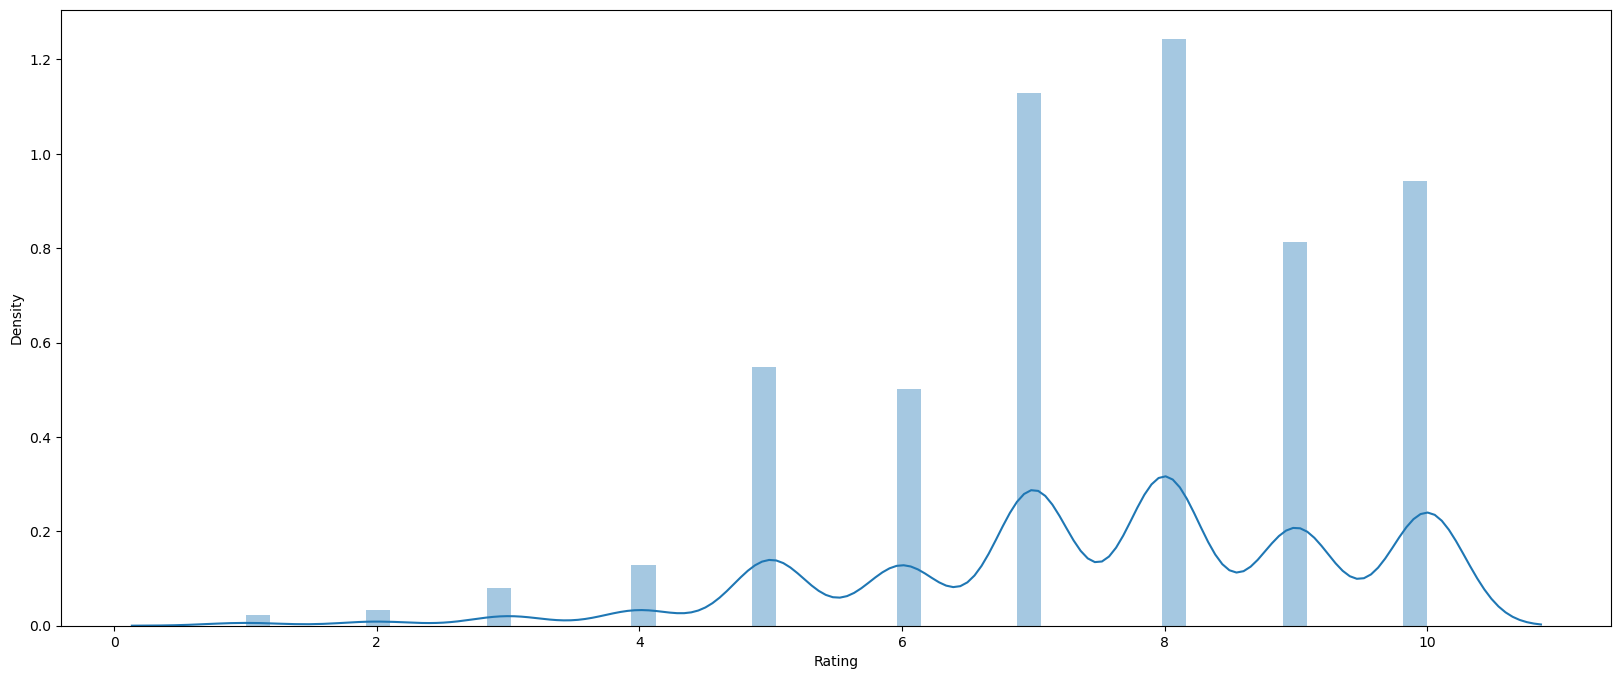

In [83]:
# Plotting The Distribution Plot of The Ratings Of the Books
plt.figure(figsize=(20,8))
sns.distplot(rsb3.Rating)
plt.show()

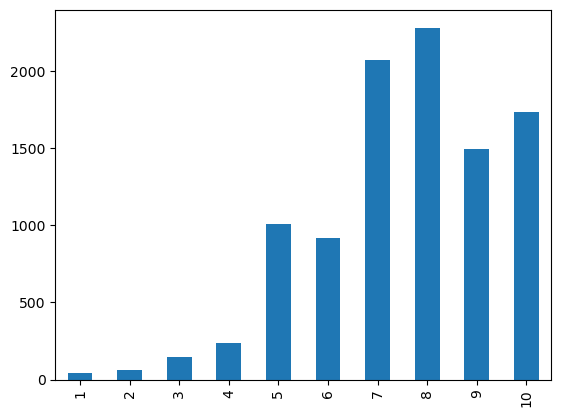

In [84]:
# Plotting The Ratings In BarPlots.
rsb3['Rating'].value_counts().sort_index().plot(kind='bar')
plt.show()

# Cosine Similarity
Cosine similarity is often used in recommendation systems to suggest items or services to customers based on their preferences. The cosine similarity between the user and product vectors is determined, and the products with the best scores are suggested to the user.

Cosine similarity measures the similarity between two viewers — that is, one user profile vs. all the others.



In [85]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

### Cosine Similarity:
The cosine similarity between two vectors A and B is calculated using the dot product and the magnitudes of the vectors.
### Cosine Distance:
The cosine distance is often defined as 1 minus the cosine similarity to convert it into a distance metric.

when you use pairwise_distances with metric='cosine', the resulting matrix will contain cosine distances between each pair of vectors in the input matrix. If you want to obtain cosine similarity instead of cosine distance, you can subtract the resulting matrix from 1.



In [86]:
#Calculating Cosine Similarity between Users
user_sim = 1 - pairwise_distances( rsb4.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [87]:
# Storing The Results In The DataFrame.
user_sim_df=pd.DataFrame(user_sim)

In [88]:
rsb2

,UserId,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [89]:
#Set the index and column names to user ids 
user_sim_df.index = rsb2.UserId.unique()
user_sim_df.columns = rsb2.UserId.unique()

In [49]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [91]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [92]:
# Most Simmilar Users 
user_sim_df.idxmax(axis=1)[0:10]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
276745    276726
276747    276726
276748    161677
276751    276726
276754    276726
dtype: int64

In [93]:
user_1=rsb2[rsb2['UserId']==276729]

In [94]:
user_2=rsb2[rsb2['UserId']==162121]

In [95]:
user_1.Title

1            Clara Callan
2    Decision in Normandy
Name: Title, dtype: object

In [96]:
user_2.Title

9990                                    The Cloister Walk
9991                                           Open Water
9992                                The Evolution of Jane
9993                                     AT PARADISE GATE
9994    I Should Have Stayed Home: The Worst Trips of ...
9995         American Fried: Adventures of a Happy Eater.
9996                                Cannibal In Manhattan
9997                      How to Flirt: A Practical Guide
9998                                             Twilight
Name: Title, dtype: object

In [97]:
pd.merge(user_1,user_2,on='Title',how='outer')

,UserId_x,Title,Rating_x,UserId_y,Rating_y
0,276729.0,Clara Callan,3.0,NaN,NaN
1,276729.0,Decision in Normandy,6.0,NaN,NaN
2,NaN,The Cloister Walk,NaN,162121.0,7.0
3,NaN,Open Water,NaN,162121.0,5.0
4,NaN,The Evolution of Jane,NaN,162121.0,8.0
5,NaN,AT PARADISE GATE,NaN,162121.0,8.0
6,NaN,I Should Have Stayed Home: The Worst Trips of ...,NaN,162121.0,8.0
7,NaN,American Fried: Adventures of a Happy Eater.,NaN,162121.0,7.0
8,NaN,Cannibal In Manhattan,NaN,162121.0,9.0
9,NaN,How to Flirt: A Practical Guide,NaN,162121.0,7.0


In [98]:
# Extract the books which userId 162113 & 276736 have watched
rsb2[(rsb2['UserId']==162113) | (rsb2['UserId']==276736)]

,UserId,Title,Rating
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
9989,162113,The Cape Ann (Contemporary American Fiction),8
